<p style="font-size: 40px; font-weight: bold; text-align: center;">Face expression detection</p>

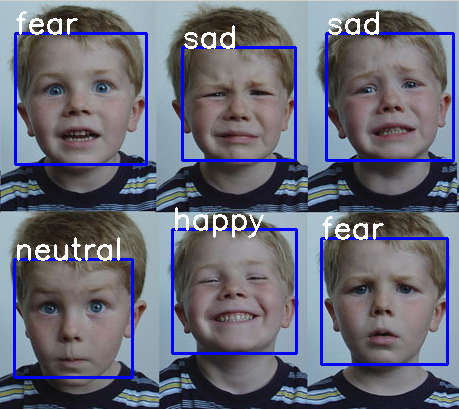

# Face Expression Detection

"Face Expression Detection" is a powerful GitHub project designed to accurately detect and analyze facial expressions in images or real-time video streams. Leveraging the capabilities of deep learning and computer vision, this project utilizes state-of-the-art techniques to identify and classify various facial expressions, such as happiness, sadness, anger, surprise, fear, and more.

## Key Features

- **Facial Expression Detection**: The project offers advanced models and methods to detect and localize faces in images or video frames, extracting relevant facial landmarks and regions for precise analysis.

- **Emotion Classification**: Utilizing deep learning techniques, the project accurately classifies detected facial expressions into predefined emotion categories, providing valuable insights into the emotional states of individuals.

- **Real-time Processing**: With efficient algorithms and optimizations, the project enables real-time facial expression detection, allowing for live emotion analysis in applications like video conferencing, entertainment, or human-computer interaction.

- **Easy Integration**: The project provides well-documented code, examples, and tutorials, making it easy for developers to integrate the facial expression detection functionality into their own applications or research projects.

- **Extensibility**: The modular and flexible architecture of the project allows for further customization and expansion. Developers can fine-tune models, incorporate additional emotion categories, or adapt the code to specific use cases as needed.

This GitHub project, "Face Expression Detection," empowers developers and researchers with an efficient and accurate toolset for understanding and interpreting human emotions. It opens up possibilities for emotion-driven applications, user experience enhancement, and psychological research, ultimately contributing to advancements in various domains such as affective computing, human-robot interaction, and sentiment analysis.


### Libraries

In [1]:
# Data manipulation and analysis libraries
import pandas as pd  
import numpy as np  

# Operating system and file handling libraries
import os  

# Data visualization libraries
import seaborn as sns 
import matplotlib.pyplot as plt  
from PIL import Image

# Image processing and deep learning libraries
from tensorflow.keras.utils import load_img  
from keras.preprocessing.image import ImageDataGenerator 

# Deep learning layers and models libraries
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D  # Used for defining neural network layers
from keras.models import Model, Sequential  
from keras.callbacks import ModelCheckpoint 
from tensorflow.keras.optimizers.legacy import Adam

# Computer vision libraries
import cv2 

# Loading and saving deep learning models
from tensorflow.keras.models import model_from_json  

# Object manipulation library
import copy 

### Data analysis

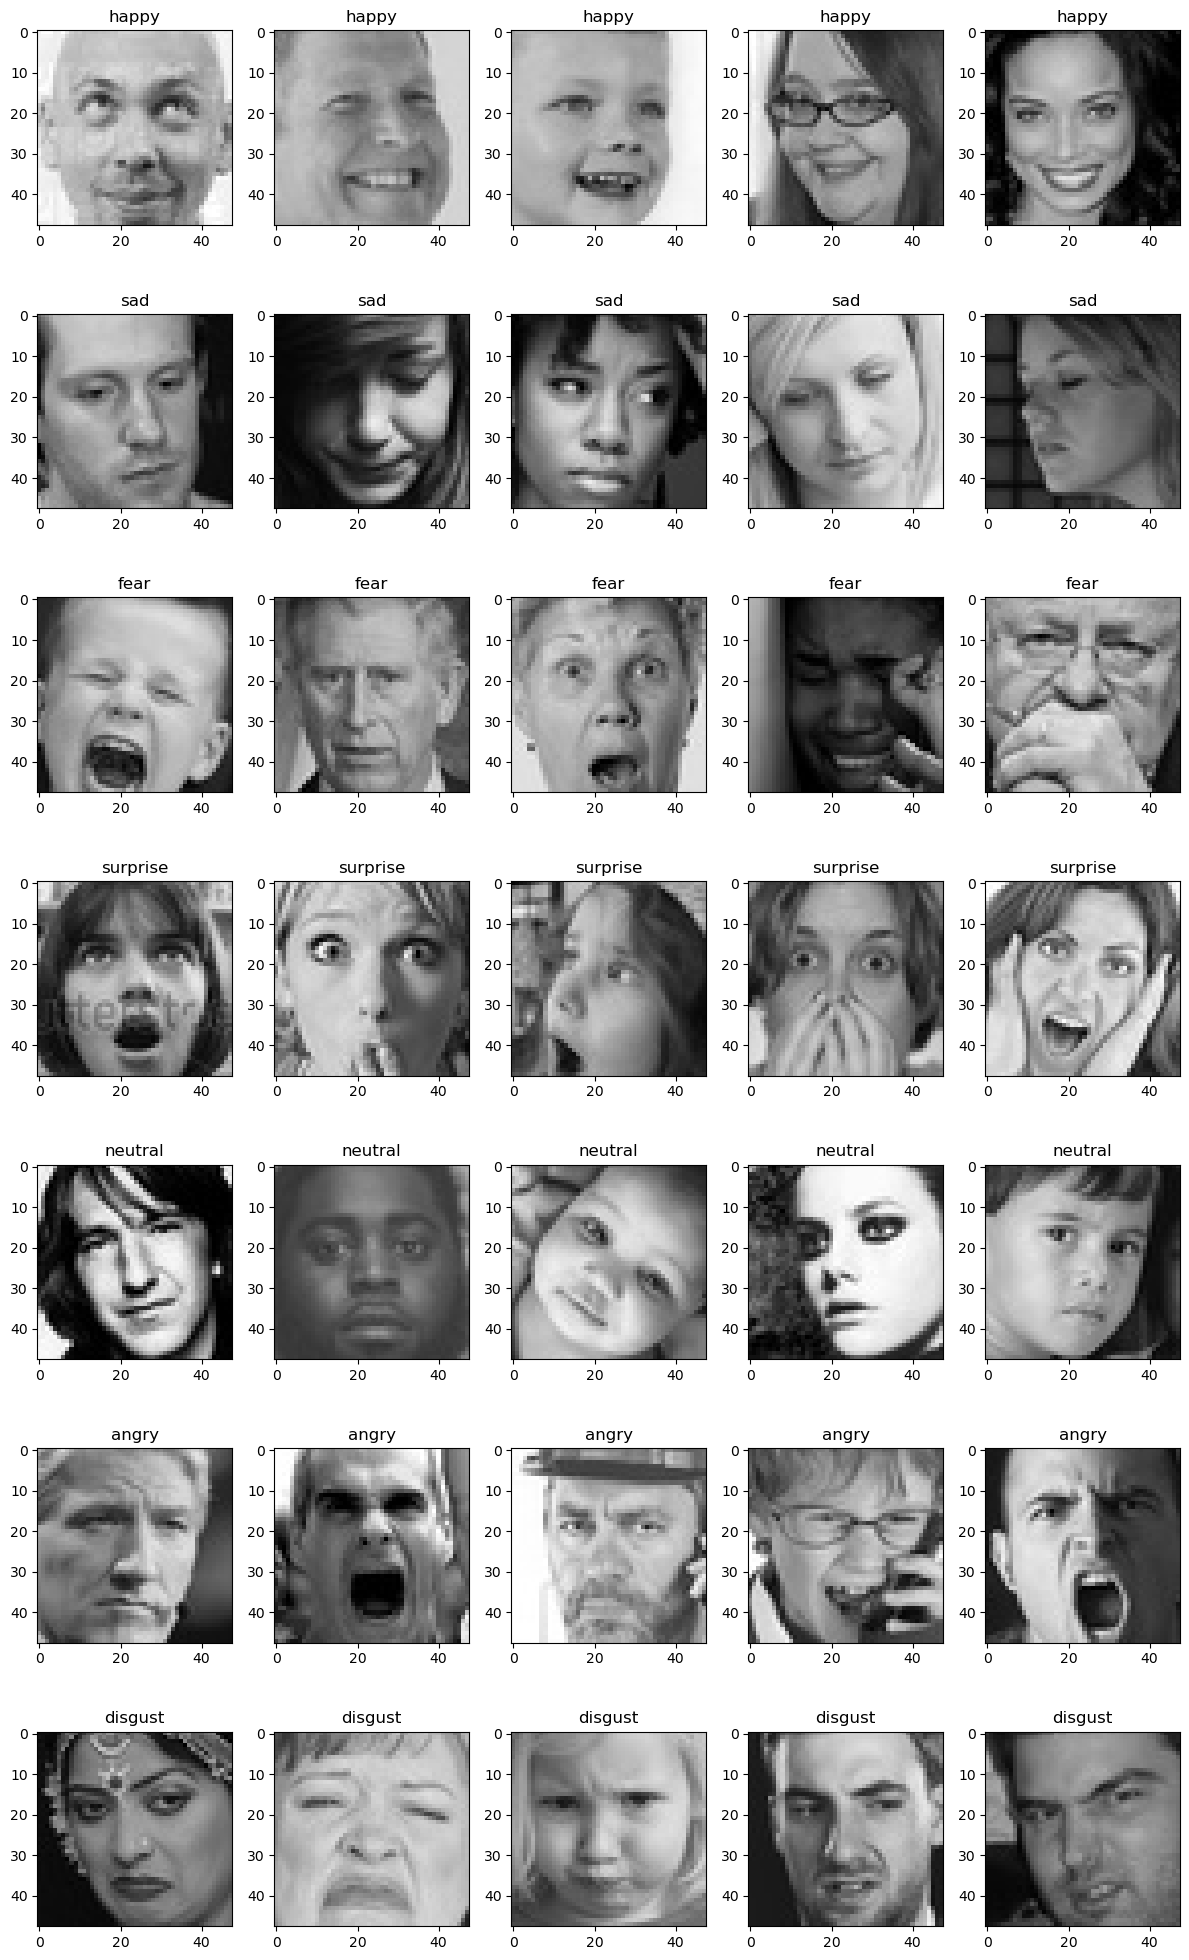

In [9]:
# Image shape
pic_width = 48
pic_height = 48

# Folder path
folder_path = '/Users/kappa/AI/Github/Face_expression_detection/images/images/'

# Create the figure
plt.figure(figsize=(12, 20))

# Image position
cpt = 0

# Main loop
for expression in os.listdir(folder_path + "train"):
    for i in range(1, 6):
        cpt += 1
        plt.subplot(7, 5, cpt)
        img_path = os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i])
        img = Image.open(img_path).convert("RGB").resize((pic_width, pic_height))
        plt.imshow(img)
        plt.title(expression)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [3]:
# Creating image generator
batch_size = 256

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range = 20,
    horizontal_flip = True
)

validation_datagen = ImageDataGenerator(
    rescale= 1/255
)

train_generator = train_datagen.flow_from_directory(
    folder_path + "train",
    target_size=(56,56),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    folder_path + "validation",
    target_size=(56,56),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [4]:
# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(56, 56,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2esx5))

model.add(Dense(nb_classes, activation='softmax'))

print(model.summary())

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

2023-07-11 12:19:12.112329: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-07-11 12:19:12.112363: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-07-11 12:19:12.112370: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-07-11 12:19:12.112406: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-11 12:19:12.112420: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 56, 56, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       2

In [5]:
%%time

# number of epochs to train the NN
epochs = 50

checkpoint = ModelCheckpoint(
    "model_weights.h5", 
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True,
    mode='max'
)

history = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_generator.n//validation_generator.batch_size,
    callbacks=[checkpoint],
    workers=-1,
    use_multiprocessing=True
)

Epoch 1/50


<timed exec>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
2023-07-11 12:19:13.051131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


112/112 [==============================] - ETA: 0s - loss: 2.0432 - accuracy: 0.2166

2023-07-11 12:19:43.260457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.26403, saving model to model_weights.h5
112/112 [==============================] - 33s 283ms/step - loss: 2.0432 - accuracy: 0.2166 - val_loss: 1.8347 - val_accuracy: 0.2640
Epoch 2/50


/Users/kappa/miniconda3/envs/btr/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


112/112 [==============================] - ETA: 0s - loss: 1.8700 - accuracy: 0.2545
Epoch 2: val_accuracy did not improve from 0.26403
112/112 [==============================] - 31s 277ms/step - loss: 1.8700 - accuracy: 0.2545 - val_loss: 1.8515 - val_accuracy: 0.2419
Epoch 3/50
112/112 [==============================] - ETA: 0s - loss: 1.8238 - accuracy: 0.2651
Epoch 3: val_accuracy improved from 0.26403 to 0.27011, saving model to model_weights.h5
112/112 [==============================] - 31s 278ms/step - loss: 1.8238 - accuracy: 0.2651 - val_loss: 1.8707 - val_accuracy: 0.2701
Epoch 4/50
112/112 [==============================] - ETA: 0s - loss: 1.7884 - accuracy: 0.2805
Epoch 4: val_accuracy improved from 0.27011 to 0.28559, saving model to model_weights.h5
112/112 [==============================] - 31s 280ms/step - loss: 1.7884 - accuracy: 0.2805 - val_loss: 1.9072 - val_accuracy: 0.2856
Epoch 5/50
112/112 [==============================] - ETA: 0s - loss: 1.7643 - accuracy: 0.2

Epoch 29/50
112/112 [==============================] - ETA: 0s - loss: 1.2864 - accuracy: 0.5060
Epoch 29: val_accuracy did not improve from 0.53342
112/112 [==============================] - 137s 1s/step - loss: 1.2864 - accuracy: 0.5060 - val_loss: 1.2752 - val_accuracy: 0.5201
Epoch 30/50
112/112 [==============================] - ETA: 0s - loss: 1.2749 - accuracy: 0.5126
Epoch 30: val_accuracy improved from 0.53342 to 0.55035, saving model to model_weights.h5
112/112 [==============================] - 157s 1s/step - loss: 1.2749 - accuracy: 0.5126 - val_loss: 1.2046 - val_accuracy: 0.5503
Epoch 31/50
112/112 [==============================] - ETA: 0s - loss: 1.2633 - accuracy: 0.5149
Epoch 31: val_accuracy did not improve from 0.55035
112/112 [==============================] - 159s 1s/step - loss: 1.2633 - accuracy: 0.5149 - val_loss: 1.2073 - val_accuracy: 0.5441
Epoch 32/50
112/112 [==============================] - ETA: 0s - loss: 1.2528 - accuracy: 0.5213
Epoch 32: val_accuracy

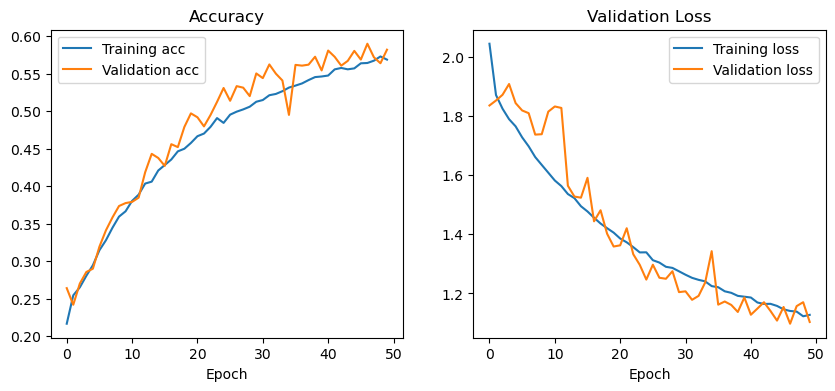

In [7]:
# Evaluating plots
fig, axs = plt.subplots(1, 2,figsize=(10,4))

# Get the length of the data
history_len = len(history.history['accuracy'])

# Create a dictionary to store the plots, labels and titles
plots = {
    'acc':['accuracy','val_accuracy','Accuracy'],
    'loss':['loss','val_loss','Validation Loss'],
}

# Iterate over the dictionary and plot the data
for i, (key,value) in enumerate(plots.items()):
    # Plot the training and validation data
    axs[i].plot(range(history_len), history.history[value[0]],label = f'Training {key}')
    axs[i].plot(range(history_len), history.history[value[1]],label = f'Validation {key}')
    # Add the legend
    axs[i].legend()
    # Set the title
    axs[i].set_title(value[2])
    # Set the x-axis label
    axs[i].set_xlabel('Epoch')
# Show the plot
plt.show()

In [21]:
# Saving model and weights
model_json = model.to_json()
model.save_weights('model.weights.h5')

# write the model to a file
with open("model.json", "w") as json_file:
    json_file.write(model_json)

### Testing

In [22]:
model_json_file = 'model.json'
model_weights_file = 'model_weights.h5'
with open(model_json_file, "r") as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(model_weights_file)

2023-07-12 10:29:23.851925: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-07-12 10:29:23.851964: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-07-12 10:29:23.851969: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-07-12 10:29:23.852469: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-12 10:29:23.852813: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    img = copy.deepcopy(frame)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        fc = gray[y:y+h, x:x+w]
        roi = cv2.resize(fc, (56, 56))

        # Normalization (if needed)
        roi = roi / 255.0

        # Reshape data to fit the model input
        roi = np.expand_dims(roi, axis=0)
        roi = np.expand_dims(roi, axis=-1)

        pred = loaded_model.predict(roi)
        text_idx = np.argmax(pred)
        text_list = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
        text = text_list[text_idx]

        cv2.putText(img, text, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0, 255), 2)
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            
    cv2.imshow("frame", img)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

## Result:

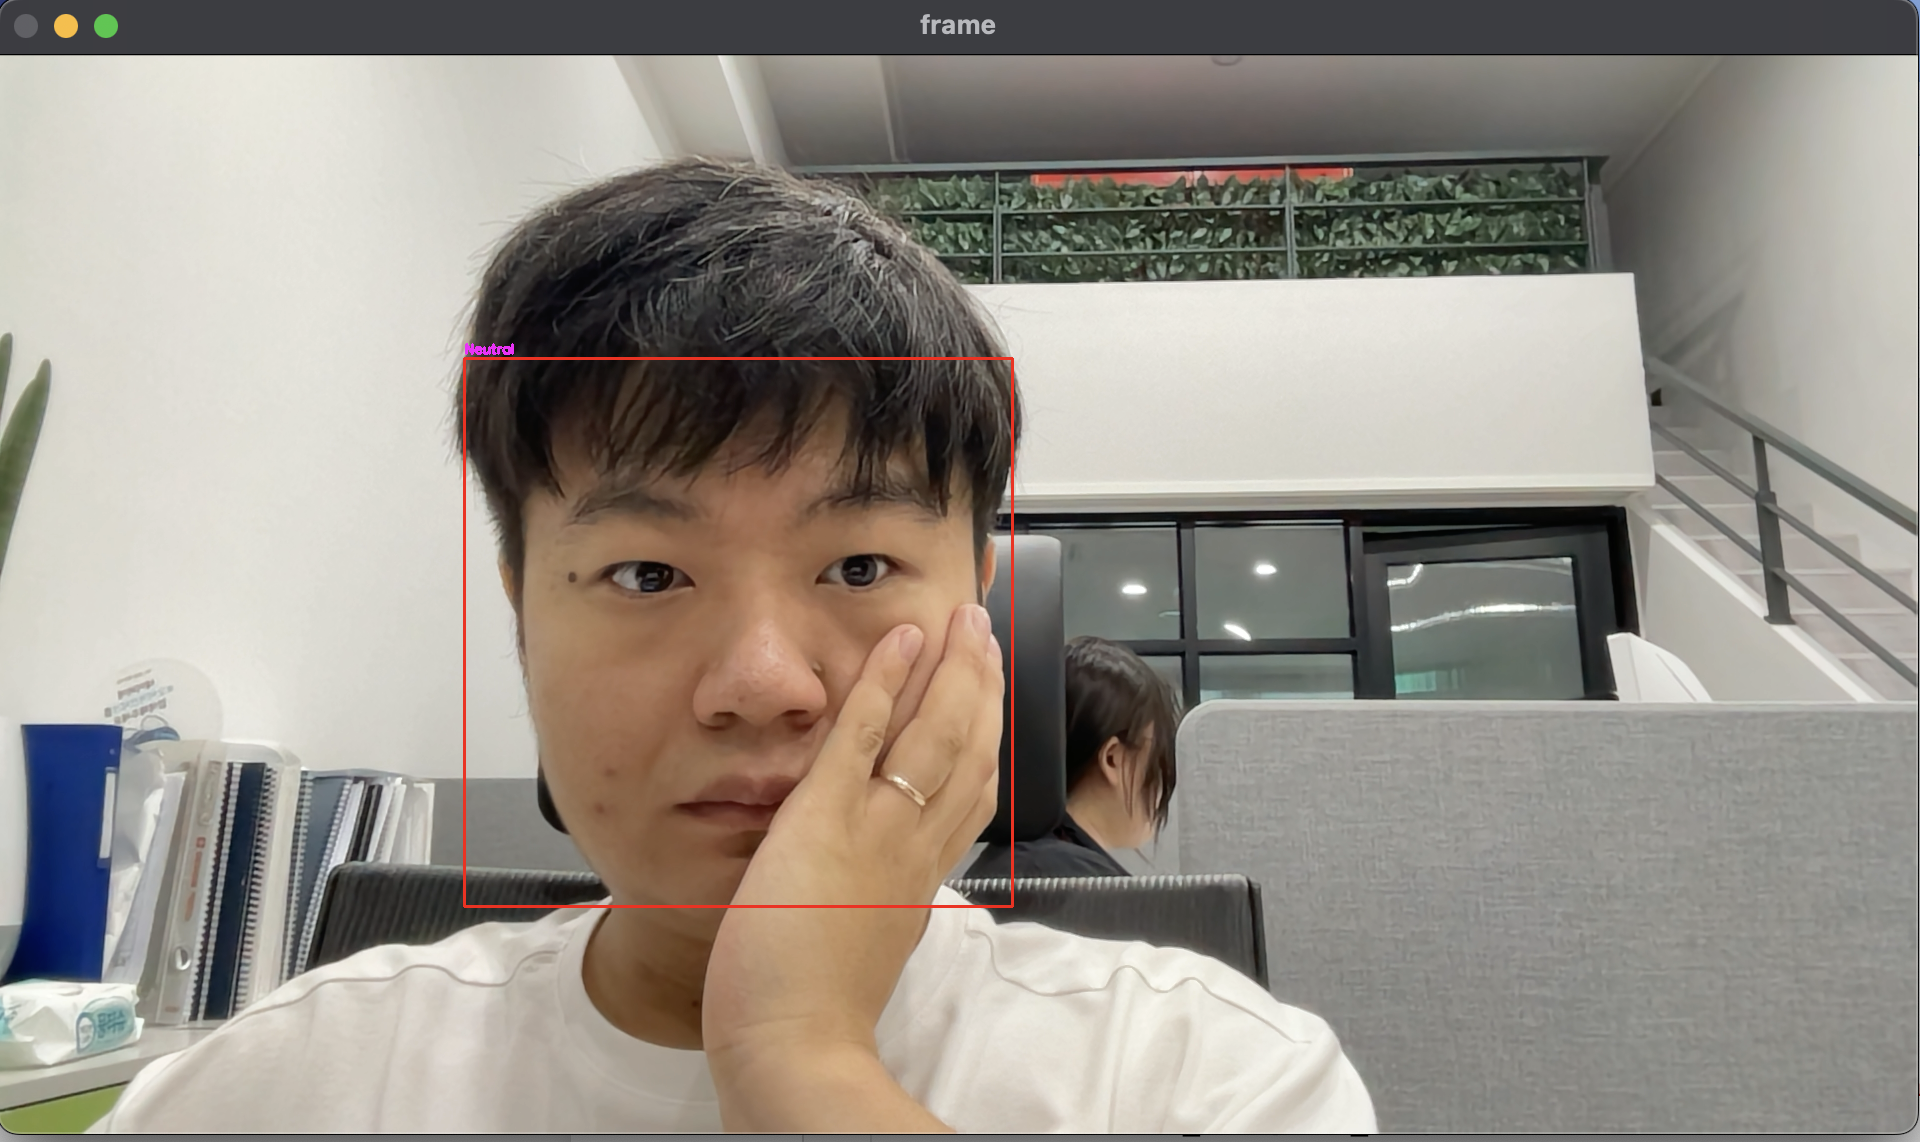